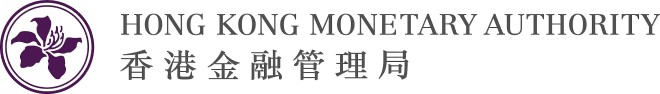

# 透過金管局API收取可靠數據

## [Daily Monetary Statistics 每日金融數據](https://www.hkma.gov.hk/chi/data-publications-and-research/data-and-statistics/daily-monetary-statistics/)
## [API Detailed Documentation 應用程式介面詳細規格](https://apidocs.hkma.gov.hk/chi/documentation/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity/)
## [API Documentation 使用說明](https://apidocs.hkma.gov.hk/documentation/)
## [JSON Output sample JSON格式示範](https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-monetary-base?pagesize=500&choose=end_of_date&from=2022-10&to=2024-07&sortorder=desc)

In [76]:
# pip install yfinance

In [77]:
import numpy as np
import pandas as pd
import requests
import yfinance as yf

import matplotlib.pyplot as plt

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [109]:
apiFrom = '2022-08-01'
apiTo = '2024-07-28'

try:
    response = requests.get(f"https://api.hkma.gov.hk/public/market-data-and-statistics/daily-monetary-statistics/daily-figures-interbank-liquidity?pagesize=1000&choose=end_of_date&from={apiFrom}&to={apiTo}&sortorder=desc")
    if response.status_code==200 : print('Connect successfully!')
    data = response.json()
except Exception as e:
    print(e)

Connect successfully!


In [110]:
data

{'header': {'success': True, 'err_code': '0000', 'err_msg': 'No error found'},
 'result': {'datasize': 492,
  'records': [{'end_of_date': '2024-07-26',
    'cu_weakside': 7.85,
    'cu_strongside': 7.75,
    'disc_win_base_rate': 5.75,
    'hibor_overnight': 4.35,
    'hibor_fixing_1m': 4.6175,
    'twi': 106.2,
    'opening_balance': 44783,
    'closing_balance': 44803,
    'market_activities': '+0',
    'interest_payment': '+0',
    'discount_window_reversal': '-0',
    'discount_window_activities': '+20',
    'intraday_movements_of_aggregate_balance_at_0930': 82852,
    'intraday_movements_of_aggregate_balance_at_1000': 133342,
    'intraday_movements_of_aggregate_balance_at_1100': 154051,
    'intraday_movements_of_aggregate_balance_at_1200': 190245,
    'intraday_movements_of_aggregate_balance_at_1500': 220647,
    'intraday_movements_of_aggregate_balance_at_1600': 220710,
    'forex_trans_t1': '+0',
    'other_market_activities_t1': '+0',
    'reversal_of_discount_window_t1': '-2

In [111]:
df_mbase = pd.DataFrame(data['result']['records'])
df_mbase = df_mbase.set_index('end_of_date')  
df_mbase.index = pd.to_datetime(df_mbase.index)
df_mbase = df_mbase.sort_values('end_of_date')
df_mbase

,cu_weakside,cu_strongside,disc_win_base_rate,hibor_overnight,hibor_fixing_1m,twi,opening_balance,closing_balance,market_activities,interest_payment,...,forex_trans_t4,other_market_activities_t4,reversal_of_discount_window_t4,interest_payment_issuance_efbn_t4,forecast_aggregate_bal_t4,forex_trans_u,other_market_activities_u,reversal_of_discount_window_u,interest_payment_issuance_efbn_u,forecast_aggregate_bal_u
end_of_date,,,,,,,,,,,,,,,,,,,,,
2022-08-01,7.85,7.75,2.75,0.83,1.31964,100.6,165158,165158,0,0,...,None,None,None,None,NaN,0,0,0,-428,150594
2022-08-02,7.85,7.75,2.75,0.88,1.28786,100.7,165158,153579,-11579,0,...,None,None,None,None,NaN,0,0,0,-443,143011
2022-08-03,7.85,7.75,2.75,0.93,1.30512,100.7,153579,144765,-8941,127,...,None,None,None,None,NaN,0,0,0,-443,128850
2022-08-04,7.85,7.75,2.75,0.95,1.43458,100.7,144765,143454,-1311,0,...,None,None,None,None,NaN,0,0,0,-443,128850
2022-08-05,7.85,7.75,2.75,0.90,1.46149,100.5,143454,129293,-14161,0,...,None,None,None,None,NaN,0,0,0,-323,128850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-22,7.85,7.75,5.75,4.40,4.63345,106.4,44987,46789,+0,+0,...,None,None,None,None,NaN,+0,+0,-0,-914,43858
2024-07-23,7.85,7.75,5.75,4.43,4.63899,106.4,46789,45007,+0,+0,...,None,None,None,None,NaN,+0,+0,-0,-925,43858
2024-07-24,7.85,7.75,5.75,4.43,4.61821,106.4,45007,44783,+0,-205,...,None,None,None,None,NaN,+0,+0,-0,-925,43858


In [112]:
df_mbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 492 entries, 2022-08-01 to 2024-07-26
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   cu_weakside                                      492 non-null    float64
 1   cu_strongside                                    492 non-null    float64
 2   disc_win_base_rate                               492 non-null    float64
 3   hibor_overnight                                  492 non-null    float64
 4   hibor_fixing_1m                                  492 non-null    float64
 5   twi                                              492 non-null    float64
 6   opening_balance                                  492 non-null    int64  
 7   closing_balance                                  492 non-null    int64  
 8   market_activities                                492 non-null    object 
 9   interest_paym

# 下載相同時段time frame的恒指數據

In [113]:
df_HSI = yf.download('^HSI', start=apiFrom, end=apiTo, progress=False)
df_HSI.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,20026.599609,20251.429688,19883.919922,20165.839844,20165.839844,1970707400
2022-08-02,19943.160156,19943.160156,19515.539062,19689.210938,19689.210938,2291211500
2022-08-03,19865.689453,19921.910156,19685.480469,19767.089844,19767.089844,1789743100


# 合併相應的時段的基本利率Base Rate往 DataFrame

In [114]:
df_HSI['HKBaseRate'] = df_mbase['disc_win_base_rate']
df_HSI.head(3)

,Open,High,Low,Close,Adj Close,Volume,HKBaseRate
Date,,,,,,,
2022-08-01,20026.599609,20251.429688,19883.919922,20165.839844,20165.839844,1970707400,2.75
2022-08-02,19943.160156,19943.160156,19515.539062,19689.210938,19689.210938,2291211500,2.75
2022-08-03,19865.689453,19921.910156,19685.480469,19767.089844,19767.089844,1789743100,2.75


# 比較Discount Window (貼現窗) Base Rate (基本利率) 與 恒指的收市價

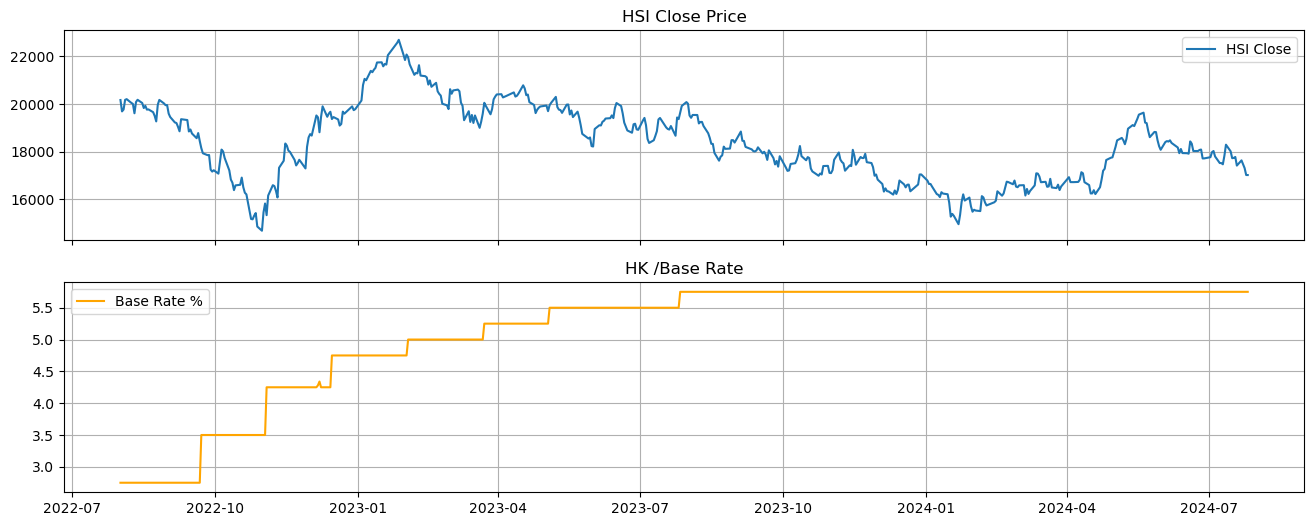

In [115]:
fig, (ax0, ax1 ) = plt.subplots(2, 1, sharex=True, figsize=(16, 6))

ax0.plot(df_HSI.index.unique(), df_HSI['Close'])
ax1.plot(df_HSI.index.unique(), df_HSI['HKBaseRate'],color='orange' )
ax0.set_title("HSI Close Price")
ax1.set_title("HK /Base Rate")
ax0.grid(True)
ax1.grid(True)
ax0.legend(['HSI Close'])
ax1.legend(['Base Rate %'])
plt.show()

# 查看Correlation 的關係

In [116]:
df_HSI['Close'].corr(df_HSI['HKBaseRate'])

-0.24044441415403733

In [117]:
df_HSI.describe()

,Open,High,Low,Close,Adj Close,Volume,HKBaseRate
count,489.000000,489.000000,489.000000,489.000000,489.000000,4.890000e+02,489.000000
mean,18355.208861,18513.224402,18188.912964,18344.923998,18344.923998,2.508781e+09,5.129080
std,1595.545039,1586.749672,1587.773025,1593.268056,1593.268056,7.993496e+08,0.924597
min,14830.690430,15113.150391,14597.309570,14687.019531,14687.019531,7.454664e+08,2.750000
25%,17120.050781,17217.859375,16918.359375,17085.330078,17085.330078,1.947231e+09,4.750000
50%,18208.980469,18415.000000,18044.859375,18234.269531,18234.269531,2.407431e+09,5.750000
75%,19537.449219,19745.439453,19390.380859,19567.689453,19567.689453,2.902363e+09,5.750000
max,22614.919922,22700.849609,22483.779297,22688.900391,22688.900391,6.506900e+09,5.750000


# 加入simple return列

In [118]:
df_HSI['SimpleRtn'] = df_HSI['Close'].pct_change(periods=1)
df_HSI

,Open,High,Low,Close,Adj Close,Volume,HKBaseRate,SimpleRtn
Date,,,,,,,,
2022-08-01,20026.599609,20251.429688,19883.919922,20165.839844,20165.839844,1970707400,2.75,NaN
2022-08-02,19943.160156,19943.160156,19515.539062,19689.210938,19689.210938,2291211500,2.75,-0.023635
2022-08-03,19865.689453,19921.910156,19685.480469,19767.089844,19767.089844,1789743100,2.75,0.003955
2022-08-04,20011.250000,20216.580078,19995.460938,20174.039062,20174.039062,1924409500,2.75,0.020587
2022-08-05,20283.589844,20283.589844,20096.539062,20201.939453,20201.939453,1635424000,2.75,0.001383
...,...,...,...,...,...,...,...,...
2024-07-22,17465.130859,17693.349609,17313.880859,17635.880859,17635.880859,2133630300,5.75,0.012528
2024-07-23,17679.550781,17707.679688,17451.859375,17469.359375,17469.359375,2216456000,5.75,-0.009442
2024-07-24,17454.429688,17516.949219,17251.259766,17311.050781,17311.050781,2208182400,5.75,-0.009062


# 加入log return列

In [119]:
np.log(df_HSI['Close']/df_HSI['Close'].shift(1))

Date
2022-08-01         NaN
2022-08-02   -0.023919
2022-08-03    0.003948
2022-08-04    0.020378
2022-08-05    0.001382
                ...   
2024-07-22    0.012450
2024-07-23   -0.009487
2024-07-24   -0.009103
2024-07-25   -0.016844
2024-07-26   -0.000035
Name: Close, Length: 489, dtype: float64

In [120]:
df_HSI['LogRtn'] = np.log(df_HSI['Close']/df_HSI['Close'].shift(1))

In [121]:
sum(np.log(df_HSI['Close']/df_HSI['Close'].shift(1)).dropna())

-0.1695239554599286

<Axes: ylabel='Frequency'>

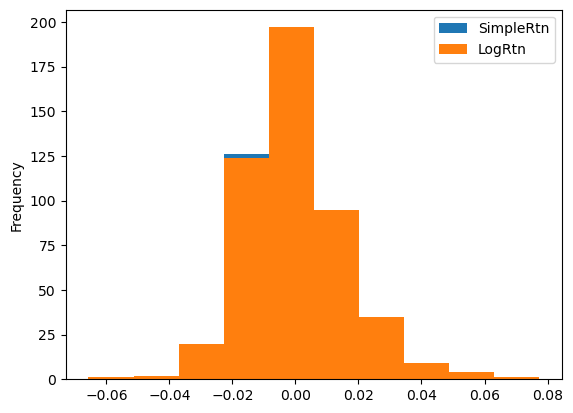

In [129]:
df_HSI[['SimpleRtn','LogRtn']].dropna().plot.hist()

In [122]:
df_HSI

,Open,High,Low,Close,Adj Close,Volume,HKBaseRate,SimpleRtn,LogRtn
Date,,,,,,,,,
2022-08-01,20026.599609,20251.429688,19883.919922,20165.839844,20165.839844,1970707400,2.75,NaN,NaN
2022-08-02,19943.160156,19943.160156,19515.539062,19689.210938,19689.210938,2291211500,2.75,-0.023635,-0.023919
2022-08-03,19865.689453,19921.910156,19685.480469,19767.089844,19767.089844,1789743100,2.75,0.003955,0.003948
2022-08-04,20011.250000,20216.580078,19995.460938,20174.039062,20174.039062,1924409500,2.75,0.020587,0.020378
2022-08-05,20283.589844,20283.589844,20096.539062,20201.939453,20201.939453,1635424000,2.75,0.001383,0.001382
...,...,...,...,...,...,...,...,...,...
2024-07-22,17465.130859,17693.349609,17313.880859,17635.880859,17635.880859,2133630300,5.75,0.012528,0.012450
2024-07-23,17679.550781,17707.679688,17451.859375,17469.359375,17469.359375,2216456000,5.75,-0.009442,-0.009487
2024-07-24,17454.429688,17516.949219,17251.259766,17311.050781,17311.050781,2208182400,5.75,-0.009062,-0.009103


In [124]:
(17021.310547 - 20165.839844)/20165.839844

-0.15593346576813155

In [92]:
# Log Return
np.log(df_HSI['Close']) - np.log(df_HSI['Close'].shift(1))

Date
2022-01-03         NaN
2022-01-04    0.000648
2022-01-05   -0.016564
2022-01-06    0.007204
2022-01-07    0.018062
                ...   
2024-07-22    0.012450
2024-07-23   -0.009487
2024-07-24   -0.009103
2024-07-25   -0.016844
2024-07-26   -0.000035
Name: Close, Length: 629, dtype: float64

In [93]:
# Log Return
np.log(1 + df_HSI['SimpleRtn'])

Date
2022-01-03         NaN
2022-01-04    0.000648
2022-01-05   -0.016564
2022-01-06    0.007204
2022-01-07    0.018062
                ...   
2024-07-22    0.012450
2024-07-23   -0.009487
2024-07-24   -0.009103
2024-07-25   -0.016844
2024-07-26   -0.000035
Name: SimpleRtn, Length: 629, dtype: float64

<Axes: ylabel='Frequency'>

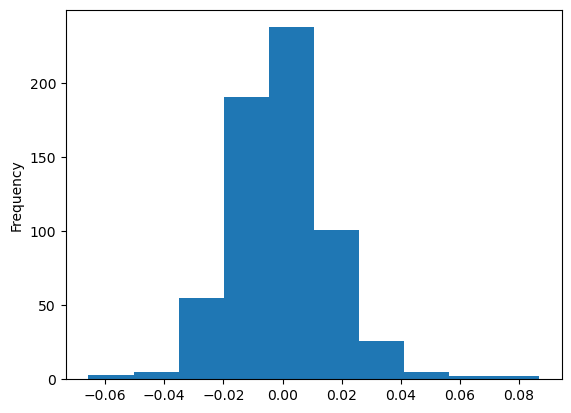

In [107]:
df_HSI['LogRtn'].plot.hist()

<Axes: ylabel='Frequency'>

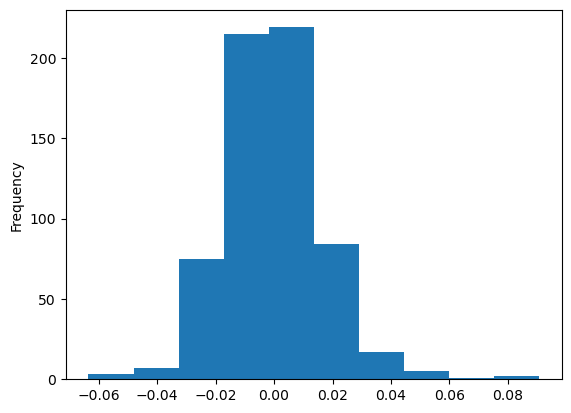

In [108]:
df_HSI['SimpleRtn'].plot.hist()

<Axes: xlabel='Date'>

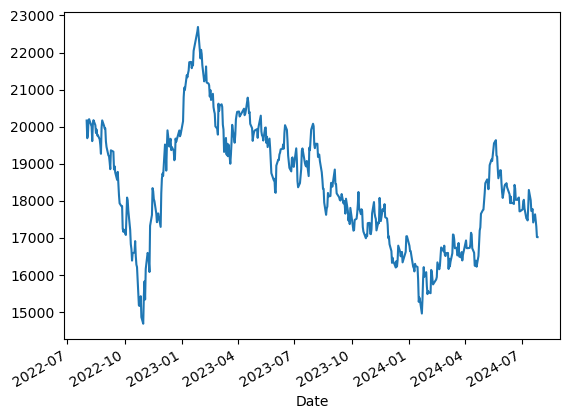

In [125]:
df_HSI['Close'].plot()

<Axes: xlabel='Date'>

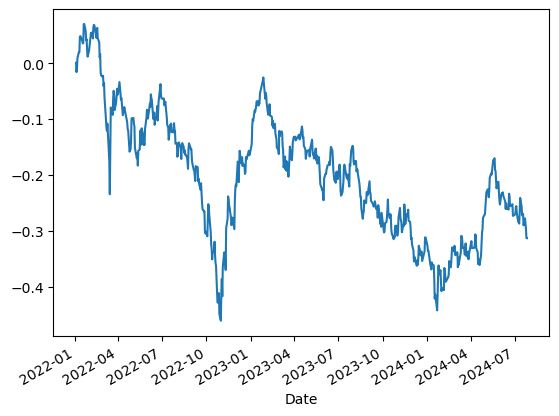

In [99]:
df_HSI['LogRtn'].cumsum().plot()